<a href="https://colab.research.google.com/github/jear2412/MCMC/blob/master/SoilCarbonModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
import numpy as np
import pystan
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import scipy
sns.set()

In [0]:

data=pd.read_csv('CO2-2.csv')
data=data.values


In [0]:
totalC_t0=7.7 #not included in data
t0=0
Nt=25
ts=data[0:25,1]
eco2mean=data[0:25,2]
eco2sd=data[0:25,3]


ts=ts.astype(float)
eco2mean=eco2mean.astype(float)
eco2sd=eco2sd.astype(float)



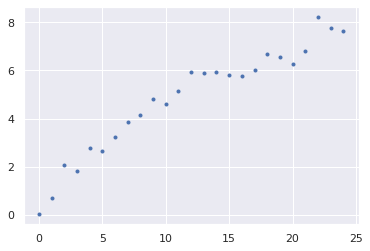

In [12]:
plt.plot(eco2mean,'.')

In [13]:

# Stan

T=50000
bi=int(0.15*T)

stan_data ={"totalC_t0": totalC_t0,
            "t0": t0,
            "N_t": Nt,
            "ts": ts,
            "eCO2mean": eco2mean,
            }
model=pystan.StanModel( file='stan4model.stan' )
fit = model.sampling(data=stan_data, test_grad = False,
                 iter=T, warmup=bi, chains=2, n_jobs=2)




INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4524ff07717ab81850baa788fefabcce NOW.


In [16]:
print(fit)


Inference for Stan model: anon_model_4524ff07717ab81850baa788fefabcce.
2 chains, each with iter=50000; warmup=7500; thin=1; 
post-warmup draws per chain=42500, total post-warmup draws=85000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
k1             0.68    0.57   0.72   0.08   0.14   0.32   0.97   2.39      2   1.61
k2              2.0    0.28   0.93   0.23   1.35   2.06   2.65   3.69     11   1.15
alpha21        0.78    0.55   0.57   0.03   0.26   0.84   1.23   1.71      1   3.23
alpha12        1.19    0.57   0.61   0.37   0.65   0.97   1.67    2.4      1   2.51
gamma          0.87    0.06   0.09   0.64   0.83   0.88   0.93    1.0      2   1.26
sigma          0.13  8.3e-4   0.02    0.1   0.12   0.13   0.14   0.17    518    1.0
eCO2_hat[1]    0.03  2.0e-5 3.9e-3   0.02   0.03   0.03   0.03   0.04  38900    1.0
eCO2_hat[2]    0.48  5.4e-3   0.03   0.42   0.46   0.48    0.5   0.53     28   1.04
eCO2_hat[3]    1.88  3.2e-3   0.08   1.73   1.83   1

In [17]:
model_dict=fit.extract()
model_dict.keys()


odict_keys(['k1', 'k2', 'alpha21', 'alpha12', 'gamma', 'sigma', 'eCO2_hat', 'lp__'])

In [18]:
fit_df = fit.to_dataframe()
fit_df.keys()



Index(['chain', 'draw', 'warmup', 'k1', 'k2', 'alpha21', 'alpha12', 'gamma',
       'sigma', 'eCO2_hat[1]', 'eCO2_hat[2]', 'eCO2_hat[3]', 'eCO2_hat[4]',
       'eCO2_hat[5]', 'eCO2_hat[6]', 'eCO2_hat[7]', 'eCO2_hat[8]',
       'eCO2_hat[9]', 'eCO2_hat[10]', 'eCO2_hat[11]', 'eCO2_hat[12]',
       'eCO2_hat[13]', 'eCO2_hat[14]', 'eCO2_hat[15]', 'eCO2_hat[16]',
       'eCO2_hat[17]', 'eCO2_hat[18]', 'eCO2_hat[19]', 'eCO2_hat[20]',
       'eCO2_hat[21]', 'eCO2_hat[22]', 'eCO2_hat[23]', 'eCO2_hat[24]',
       'eCO2_hat[25]', 'lp__', 'accept_stat__', 'stepsize__', 'treedepth__',
       'n_leapfrog__', 'divergent__', 'energy__'],
      dtype='object')

In [0]:

def pplot_trace(param, param_name='parameter'):
    """Plot the trace and posterior of a parameter."""

    # Summary statistics
    mean = np.mean( param )
    median = np.median( param )
    cred_min, cred_max = np.percentile( param, 2.5 ), np.percentile( param, 97.5 )

    # Plotting
    plt.subplot( 2, 1, 1 )
    plt.plot( param )
    plt.xlabel( 'samples' )
    plt.ylabel( param_name )
    plt.axhline( mean, color='r', lw=2, linestyle='--' )
    plt.axhline( median, color='c', lw=2, linestyle='--' )
    plt.axhline( cred_min, linestyle=':', color='k', alpha=0.2 )
    plt.axhline( cred_max, linestyle=':', color='k', alpha=0.2 )
    plt.title( 'Trace and Posterior Distribution for {}'.format( param_name ) )

    plt.subplot( 2, 1, 2 )
    plt.hist( param, 30, density=True );
    sns.kdeplot( param, shade=True )
    plt.xlabel( param_name )
    plt.ylabel( 'density' )
    plt.axvline( mean, color='r', lw=2, linestyle='--', label='mean' )
    plt.axvline( median, color='c', lw=2, linestyle='--', label='median' )
    plt.axvline( cred_min, linestyle=':', color='k', alpha=0.2, label='95% CI' )
    plt.axvline( cred_max, linestyle=':', color='k', alpha=0.2 )

    plt.gcf().tight_layout()
    plt.legend()


/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/pairplot.py:216: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  UserWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb898433a90>,
      dtype=object)

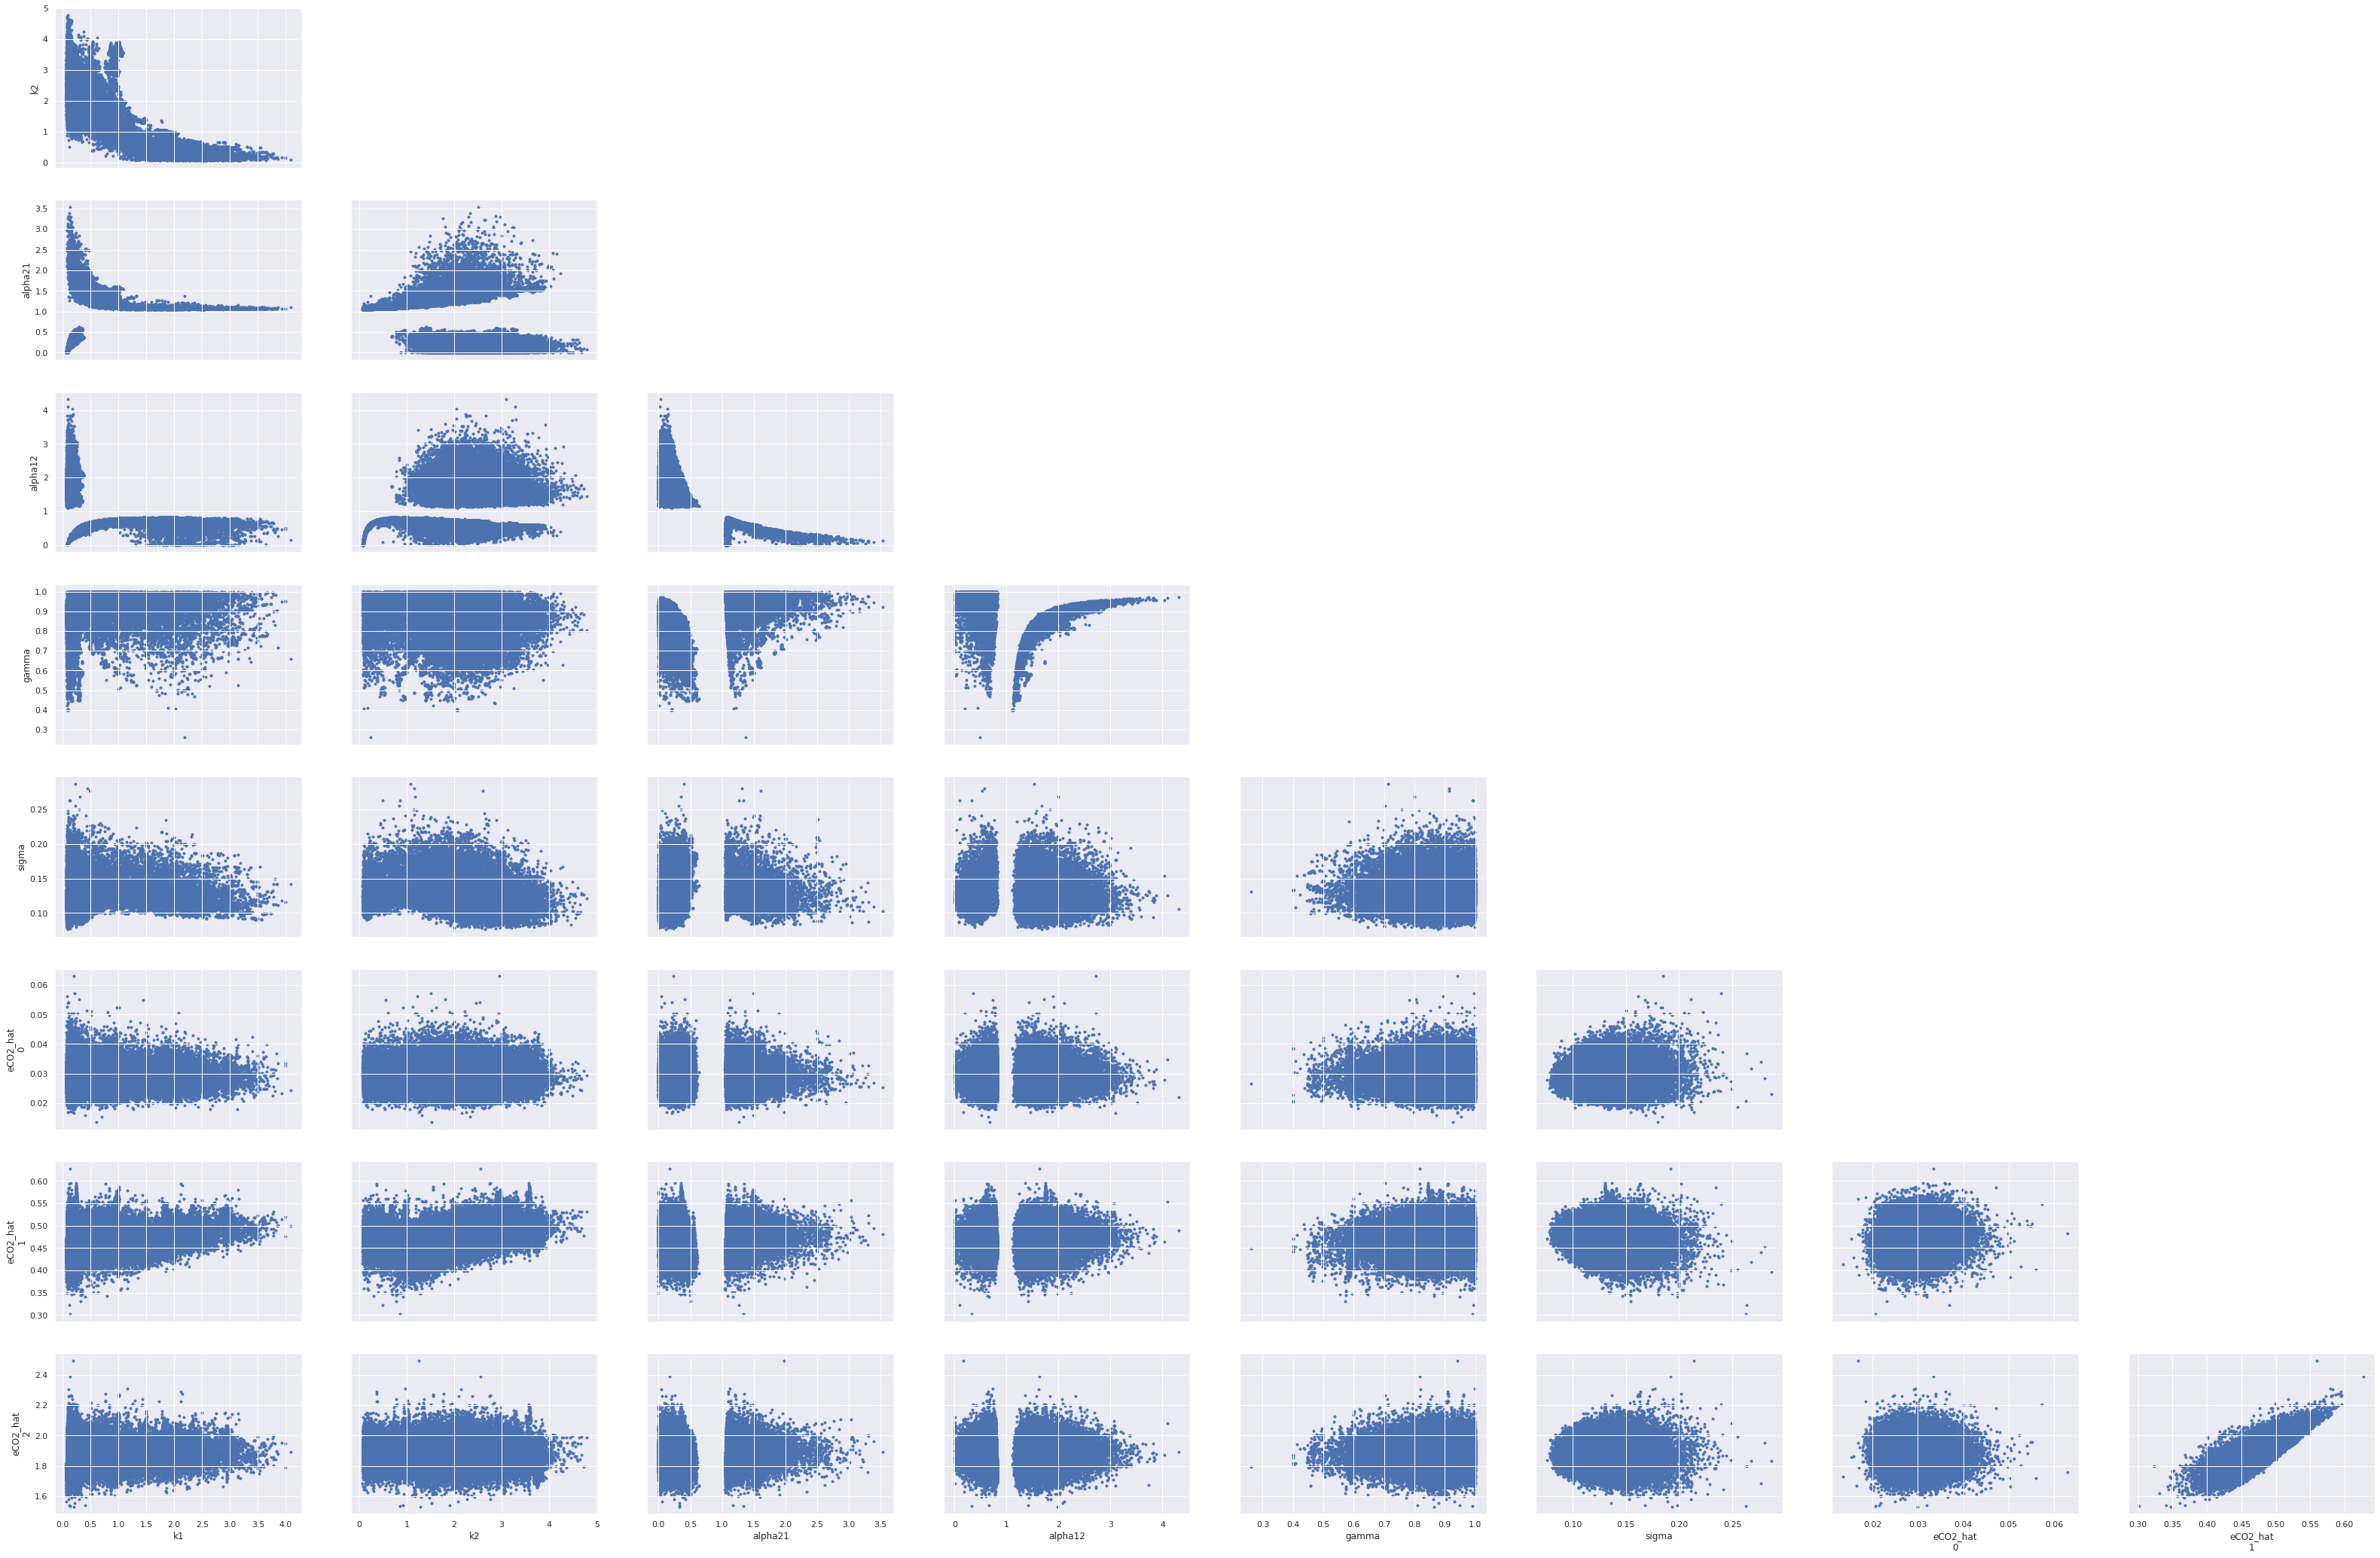

In [21]:

az_data=az.from_pystan(fit)
az.plot_pair(az_data)


/usr/local/lib/python3.6/dist-packages/arviz/plots/traceplot.py:239: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (31), generating only 20 plots
  UserWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb893e304a8>,
      dtype=object)

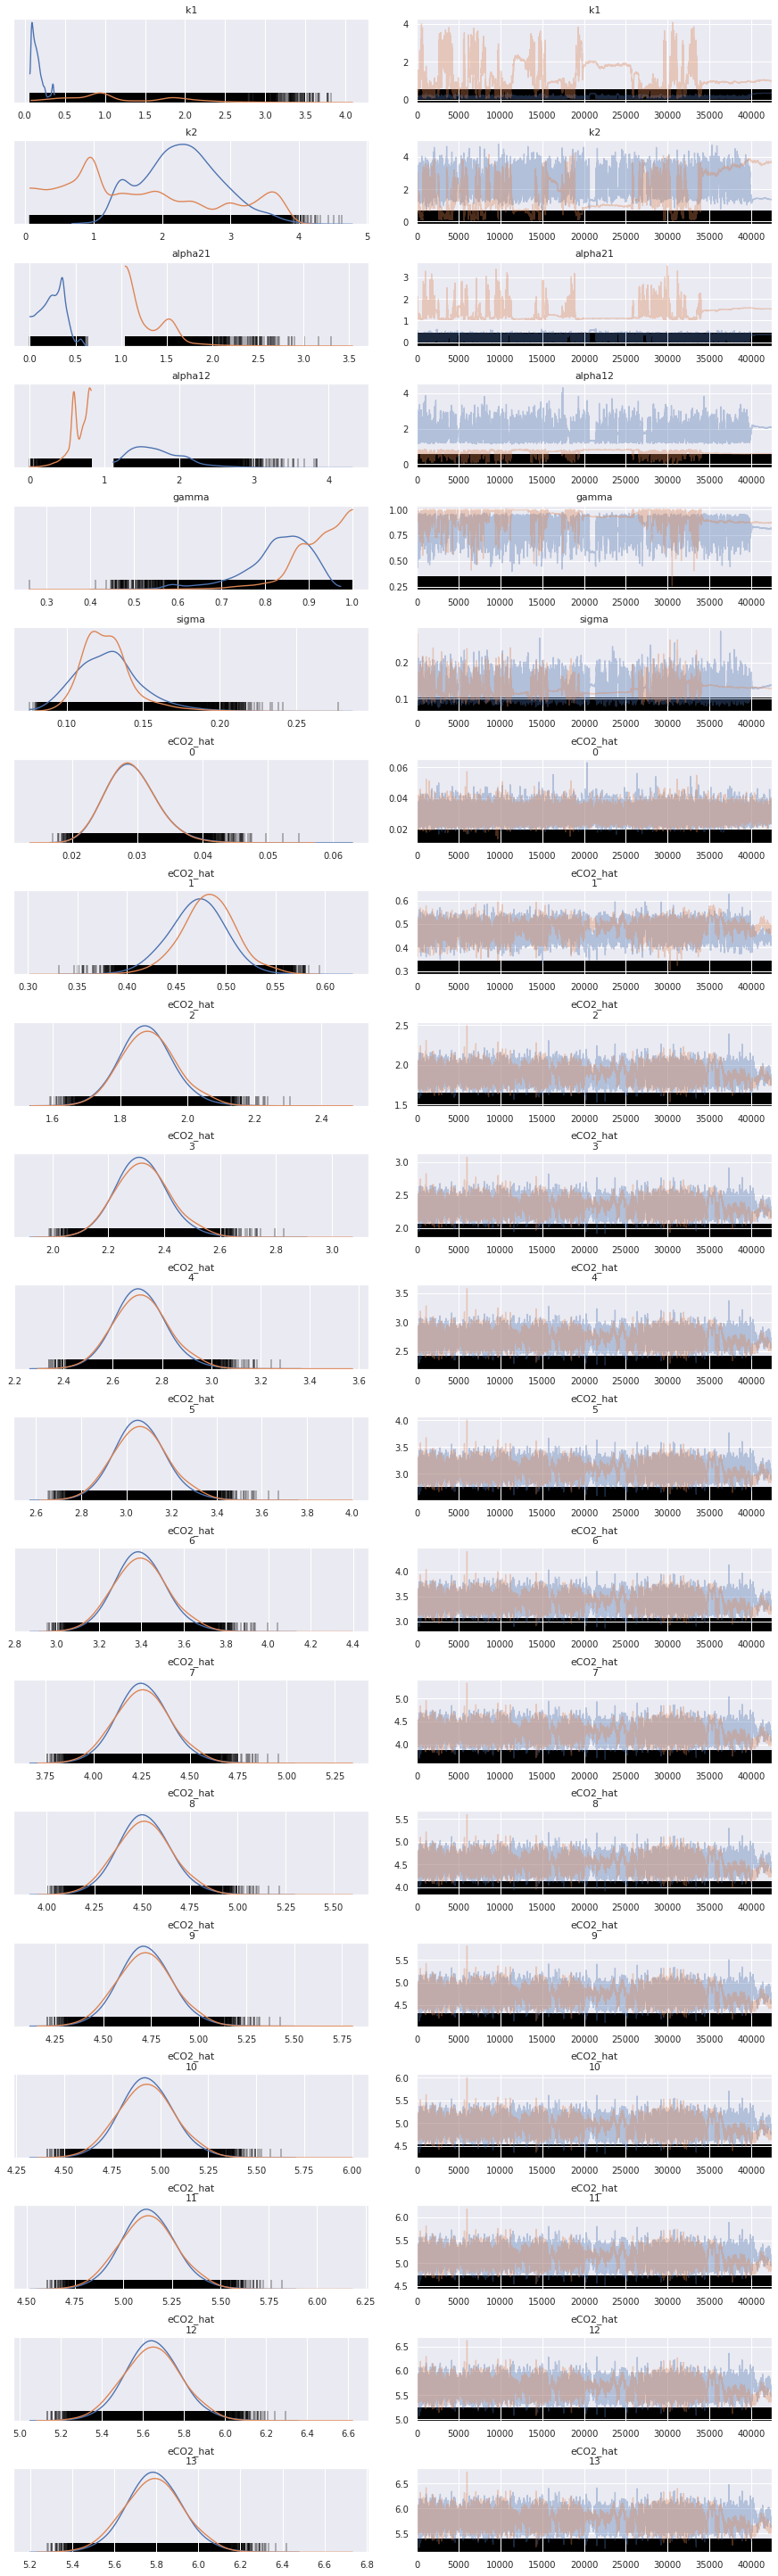

In [22]:
az.plot_trace(az_data)

In [0]:
draw = fit_df['draw']
k1 = fit_df['k1']
k2 = fit_df['k2']
alpha21=fit_df['alpha21']
alpha12=fit_df['alpha12']
gamma=fit_df['gamma']
sigma=fit_df['sigma']

k1=pd.Series.to_numpy(k1)
k2=pd.Series.to_numpy(k2)
alpha12=pd.Series.to_numpy(alpha12)
alpha21=pd.Series.to_numpy(alpha21)
gamma=pd.Series.to_numpy(gamma)
sigma=pd.Series.to_numpy(sigma)





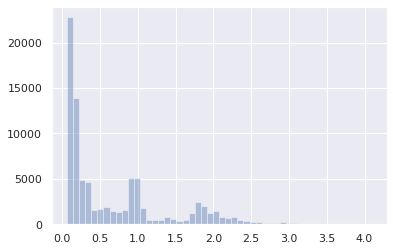

In [64]:
sns.distplot(k1, kde=False)



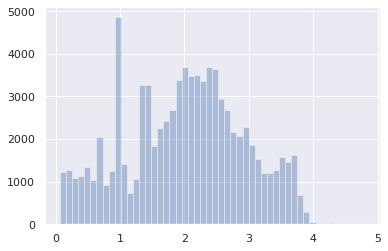

In [65]:
sns.distplot(k2, kde=False)


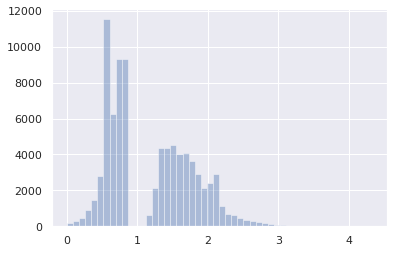

In [66]:
sns.distplot(alpha12, kde=False)


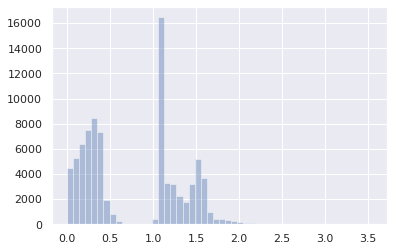

In [67]:
sns.distplot(alpha21,kde=False)


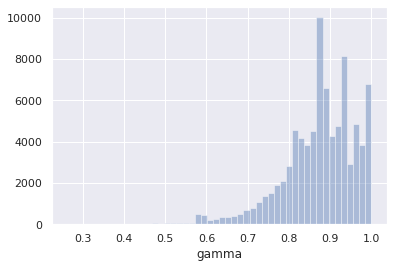

In [29]:
sns.distplot(gamma, kde=False)


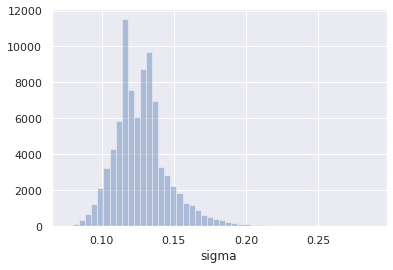

In [31]:
sns.distplot(sigma, kde=False)

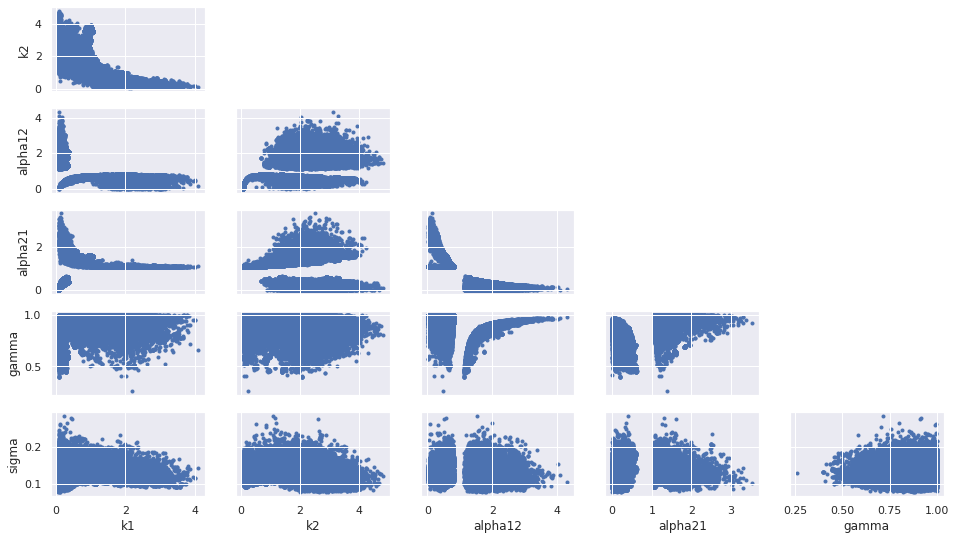

In [32]:
az.plot_pair(az_data, figsize=(16,9) , divergences=False, var_names=['k1', 'k2', 'alpha12', 'alpha21', 'gamma', 'sigma' ]);


In [0]:
#----- Predictive Distribution


#two pool ODE definition 


def scODE(t, X, k1, k2, alpha12, alpha21 ):
  C1=X[0]
  C2=X[1]
  dC1dt= - k1*C1+ alpha12* k2*C2 
  dC2dt= - k2*C2+ alpha21* k1*C1
  return np.array([dC1dt,dC2dt])
 







In [0]:

def predobs( k1, k2, alpha12, alpha21, gamma, sigma, sample_size=150 ):
    L=len(k1)

    obs=np.zeros([ sample_size  , Nt]) 
    hat_eCO2=np.zeros([ sample_size  , Nt]) 
    SC1t=np.zeros([ sample_size  , Nt])
    SC2t=np.zeros([ sample_size  , Nt]) 
    
    ts=np.arange(0,Nt, 1)
    
    #sample of size sample_size of betas and I0s. 
    #which observations to take into account for the predictive
    indexes=np.random.choice(a = np.arange( 0, L )   , size = sample_size, replace = False)
    

    sk1=k1[indexes]
    sk2=k2[indexes]
    salpha12=alpha12[indexes]
    salpha21=alpha21[indexes]
    sgamma=gamma[indexes]
    ssigma=sigma[indexes]
    times=np.append( t0, ts)
    for i in range(sample_size ):
        X0=np.array( [gamma[i]*totalC_t0, (1-gamma[i])*totalC_t0  ] )
        Xt=scipy.integrate.solve_ivp( scODE , t_span=(t0, ts[Nt-1]), y0=X0,method='RK45',t_eval=ts , args=(sk1[i], sk2[i], salpha12[i], salpha21[i]) ) 
        
      
        SC1t[i]=Xt.y[0]
        SC2t[i]=Xt.y[1]

        hat_eCO2[i]=totalC_t0-( SC1t[i]+SC2t[i] )
        hat_eCO2[hat_eCO2<0]=0
        #obs[i]=np.exp(scipy.stats.norm.rvs(  loc= np.log(hat_eCO2[i]), scale= sigma[i]  ))
        
    return SC1t, SC2t, hat_eCO2, obs

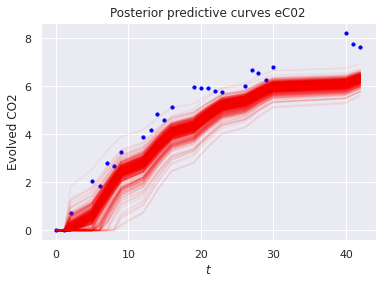

In [329]:

SC1t, SC2t, hat_eCO2, obs= predobs(k1, k2, alpha12, alpha21, gamma, sigma, sample_size=500 )


indexes=np.random.choice(a = np.arange( 0,  obs.shape[0] ), size =500, replace = False)
obs_samples=obs[indexes]

times=np.append( t0, ts)

for i in range( len(obs_samples )  ):
    plt.plot(times, np.append(0,hat_eCO2[i]), color='red' , alpha=0.07 )

plt.scatter(times,np.append(0,eco2mean), s=10, color='blue', zorder=1)
plt.xlabel( r'$t$' )
plt.ylabel( r'Evolved CO2' )
plt.title( 'Posterior predictive curves eC02' )
plt.savefig( 'eCO2-predictive.png', dpi=500  )
plt.show()






In [0]:
q1=pd.DataFrame.quantile(fit_df, q=0.025)
q2=pd.DataFrame.quantile(fit_df, q=0.975)
medians=pd.DataFrame.median(fit_df)



In [0]:
q1=q1[9:34]
q2=q2[9:34]

In [0]:
q1=pd.DataFrame.to_numpy(q1)
q2=pd.DataFrame.to_numpy(q2)

25

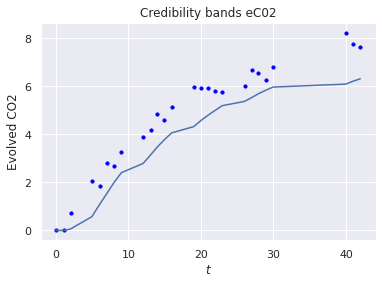

In [330]:

plt.plot(t, np.append(0,np.median(hat_eCO2,0))  , label='Posterior median' )
plt.plot(times,np.append(0,eco2mean), color='blue', label='Observed')
plt.fill_between( t, lzhat, uzhat , alpha=0.3 )
plt.xlabel( r'$t$' )
plt.ylabel( r'Evolved CO2' )
plt.title( 'Credibility bands eC02' )
plt.savefig( 'eCO2-predictive.png', dpi=500  )
plt.show()


